Use the Boats data and perform market segmentation
analysis using appropriate software and method of
choice. Use train/test approach to validate the segments.
(25

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [43]:
#read data from Boats.xlsx file
data = pd.read_excel('Boats.xlsx')
#display first few rows of the dataframe
print(data.head())

   RESPID  Q1.1  Q1.2  Q1.3  Q1.4  Q1.5  Q1.6  Q1.7  Q1.8  Q1.9  ...  Q16.20  \
0   23822     5     1     5     5     5     5     5     3     5  ...       4   
1  224795     3     2     4     4     4     4     5     3     4  ...       4   
2   20952     3     1     4     4     5     4     4     2     4  ...       5   
3    5612     5     2     3     4     5     5     3     3     3  ...       4   
4   15016     4     2     4     5     5     4     5     4     5  ...       4   

   Q16.21  Q16.22  Q16.23  Q16.24  Q16.25  Q16.26  Q16.27  Q17  Q18  
0       4       4       4       5       4       4       4    0    1  
1       3       3       4       3       3       3       3    1    1  
2       3       3       5       2       4       3       5    1    0  
3       4       4       4       2       5       5       4    1    0  
4       4       5       5       3       4       5       4    0    0  

[5 rows x 82 columns]


In [3]:
# Check the data for missing values and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2813 entries, 0 to 2812
Data columns (total 82 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   RESPID      2813 non-null   int64
 1   Q1.1        2813 non-null   int64
 2   Q1.2        2813 non-null   int64
 3   Q1.3        2813 non-null   int64
 4   Q1.4        2813 non-null   int64
 5   Q1.5        2813 non-null   int64
 6   Q1.6        2813 non-null   int64
 7   Q1.7        2813 non-null   int64
 8   Q1.8        2813 non-null   int64
 9   Q1.9        2813 non-null   int64
 10  Q1.10       2813 non-null   int64
 11  Q1.11       2813 non-null   int64
 12  Q1.12       2813 non-null   int64
 13  Q1.13       2813 non-null   int64
 14  Q1.14       2813 non-null   int64
 15  Q1.15       2813 non-null   int64
 16  Q1.16       2813 non-null   int64
 17  Q1.17       2813 non-null   int64
 18  Q1.18       2813 non-null   int64
 19  Q1.19       2813 non-null   int64
 20  Q1.20       2813 non-null   in

In [4]:
print(data.describe())

              RESPID         Q1.1         Q1.2         Q1.3         Q1.4  \
count    2813.000000  2813.000000  2813.000000  2813.000000  2813.000000   
mean   198862.352648     4.028084     2.886242     3.115535     3.890508   
std    177838.500851     0.819565     1.013704     1.021019     0.819889   
min        10.000000     1.000000     1.000000     1.000000     1.000000   
25%     12253.000000     4.000000     2.000000     2.000000     3.000000   
50%    225667.000000     4.000000     3.000000     3.000000     4.000000   
75%    240371.000000     5.000000     4.000000     4.000000     4.000000   
max    489965.000000     5.000000     5.000000     5.000000     5.000000   

              Q1.5         Q1.6         Q1.7         Q1.8         Q1.9  ...  \
count  2813.000000  2813.000000  2813.000000  2813.000000  2813.000000  ...   
mean      3.552435     3.954497     3.674369     3.737291     2.886242  ...   
std       0.927591     0.824193     0.897230     0.816538     1.076319  ...   

In [5]:
data.tail()

,RESPID,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,...,Q16.20,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27,Q17,Q18
2808,485225,5,1,5,5,5,5,5,2,3,...,5,5,3,4,4,3,4,4,0,0
2809,484245,2,1,2,1,1,1,2,1,1,...,3,4,3,3,4,2,4,4,0,0
2810,224990,3,3,4,4,3,3,4,3,4,...,3,4,3,3,2,3,3,3,0,0
2811,17590,4,2,4,4,4,3,3,4,2,...,4,4,4,3,3,3,3,2,0,0
2812,8241,5,5,2,2,1,2,3,5,1,...,4,2,4,4,2,2,1,2,0,0


In [6]:
# check data set for entries other than (1,2,3,4,5) in all cols except RESPID
for col in data.columns:
    if col != 'RESPID':
        invalid_entries = data[~data[col].isin([1, 2, 3, 4, 5])]
        if not invalid_entries.empty:
            print(f"Invalid entries found in column {col}:")
            print(invalid_entries)

Invalid entries found in column Q2:
      RESPID  Q1.1  Q1.2  Q1.3  Q1.4  Q1.5  Q1.6  Q1.7  Q1.8  Q1.9  ...  \
7      12342     4     3     4     4     4     5     4     4     5  ...   
11    489191     5     5     4     4     5     4     4     4     5  ...   
14     16919     4     5     4     4     4     4     5     4     5  ...   
15    422979     5     5     4     3     4     4     5     4     4  ...   
17     19244     3     5     3     5     4     4     3     3     1  ...   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
2785    5249     4     2     2     3     3     5     4     4     2  ...   
2797   19452     2     4     2     3     2     4     4     4     2  ...   
2805  474399     4     3     1     3     3     3     2     4     3  ...   
2811   17590     4     2     4     4     4     3     3     4     2  ...   
2812    8241     5     5     2     2     1     2     3     5     1  ...   

      Q16.20  Q16.21  Q16.22  Q16.23  Q16.24  Q16.25  Q16.26  Q

# Exploratory Analysis - Univariate Analysis

Total number of features: 81
Feature names: ['Q1.1', 'Q1.2', 'Q1.3', 'Q1.4', 'Q1.5', 'Q1.6', 'Q1.7', 'Q1.8', 'Q1.9', 'Q1.10', 'Q1.11', 'Q1.12', 'Q1.13', 'Q1.14', 'Q1.15', 'Q1.16', 'Q1.17', 'Q1.18', 'Q1.19', 'Q1.20', 'Q1.21', 'Q1.22', 'Q1.23', 'Q1.24', 'Q1.25', 'Q1.26', 'Q1.27', 'Q1.28', 'Q1.29', 'Q2', 'Q2.Cluster', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7.1', 'Q7.2', 'Q7.3', 'Q7.4', 'Q8', 'Q9.1', 'Q9.2', 'Q9.3', 'Q9.4', 'Q9.5', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q16.1', 'Q16.2', 'Q16.3', 'Q16.4', 'Q16.5', 'Q16.6', 'Q16.7', 'Q16.8', 'Q16.9', 'Q16.10', 'Q16.11', 'Q16.12', 'Q16.13', 'Q16.14', 'Q16.15', 'Q16.16', 'Q16.17', 'Q16.18', 'Q16.19', 'Q16.20', 'Q16.21', 'Q16.22', 'Q16.23', 'Q16.24', 'Q16.25', 'Q16.26', 'Q16.27', 'Q17', 'Q18']

=== Summary Statistics ===
              Q1.1         Q1.2         Q1.3         Q1.4         Q1.5  \
count  2813.000000  2813.000000  2813.000000  2813.000000  2813.000000   
mean      4.028084     2.886242     3.115535     3.890508     3.552435   
std    

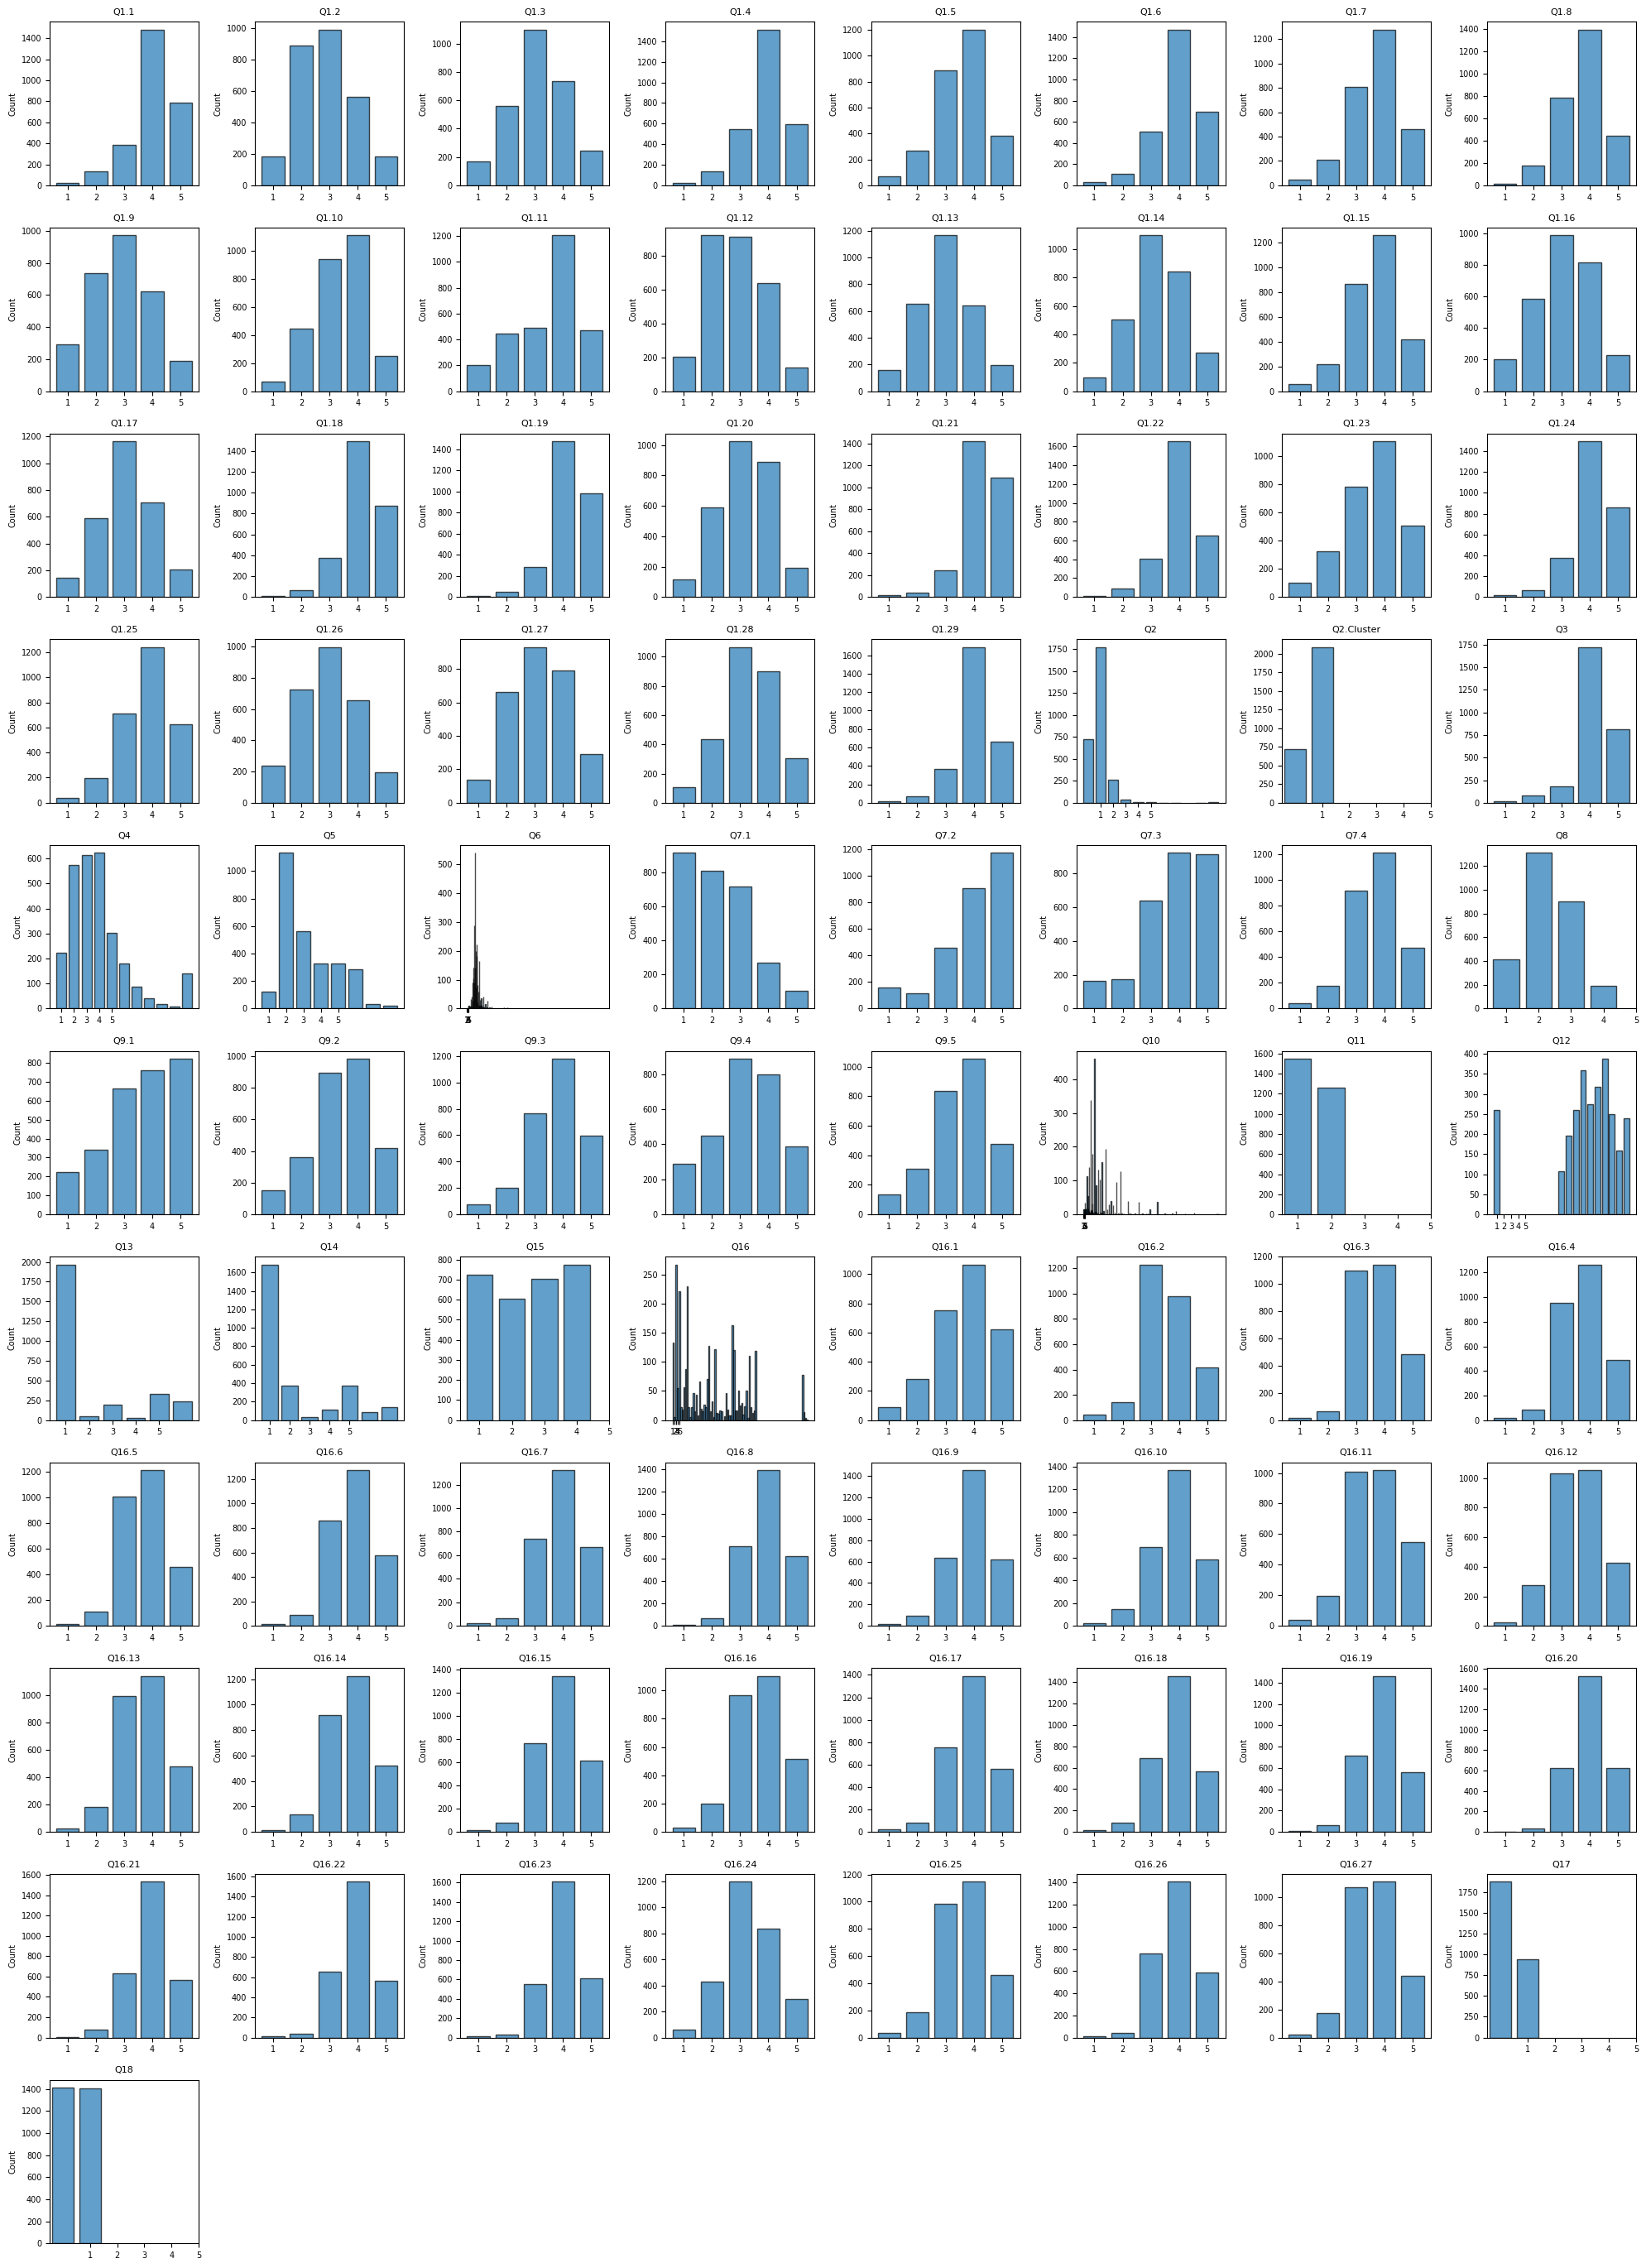


✓ Univariate analysis visualization saved as 'univariate_analysis.png'


In [44]:


# Get all columns except RESPID
feature_cols = [col for col in data.columns if col != 'RESPID']

print(f"Total number of features: {len(feature_cols)}")
print(f"Feature names: {feature_cols}\n")

# Summary statistics for all features
print("=== Summary Statistics ===")
print(data[feature_cols].describe())

# Mode (most common value) for each feature
print("\n=== Most Common Value (Mode) for Each Feature ===")
for col in feature_cols:
    mode_val = data[col].mode()[0]
    mode_count = (data[col] == mode_val).sum()
    mode_pct = (mode_count / len(data)) * 100
    print(f"{col}: {mode_val} ({mode_count} responses, {mode_pct:.1f}%)")

# Value counts for each feature
print("\n=== Value Counts for Each Feature ===")
for col in feature_cols[:5]:  # Show first 5 as example
    print(f"\n{col}:")
    print(data[col].value_counts().sort_index())
print("\n... (showing first 5 features)")

# Visualize distributions - Create a grid of histograms
import matplotlib.pyplot as plt
import math

# Calculate grid dimensions
n_features = len(feature_cols)
n_cols = 8  # 8 plots per row
n_rows = math.ceil(n_features / n_cols)

# Create large figure with all distributions
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 2.5))
axes = axes.flatten() if n_features > 1 else [axes]

for idx, col in enumerate(feature_cols):
    ax = axes[idx]
    value_counts = data[col].value_counts().sort_index()
    ax.bar(value_counts.index, value_counts.values, edgecolor='black', alpha=0.7)
    ax.set_title(col, fontsize=8)
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=7)
    ax.tick_params(labelsize=7)
    ax.set_xticks([1, 2, 3, 4, 5])

# Hide extra subplots
for idx in range(n_features, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('univariate_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✓ Univariate analysis visualization saved as 'univariate_analysis.png'")

=== Overall Response Pattern Analysis ===

Overall distribution of responses across all 82 features:
  Response 0: 2.07%
  Response 1: 8.30%
  Response 2: 10.08%
  Response 3: 24.33%
  Response 4: 34.51%
  Response 5: 15.66%
  Response 6: 0.37%
  Response 7: 0.13%
  Response 8: 0.06%
  Response 9: 0.05%
  Response 10: 0.22%
  Response 11: 0.16%
  Response 12: 0.16%
  Response 13: 0.17%
  Response 14: 0.16%
  Response 15: 0.25%
  Response 16: 0.26%
  Response 17: 0.16%
  Response 18: 0.23%
  Response 19: 0.15%
  Response 20: 0.39%
  Response 21: 0.08%
  Response 22: 0.10%
  Response 23: 0.07%
  Response 24: 0.15%
  Response 25: 0.18%
  Response 26: 0.05%
  Response 27: 0.01%
  Response 28: 0.08%
  Response 29: 0.01%
  Response 30: 0.28%
  Response 31: 0.01%
  Response 32: 0.02%
  Response 33: 0.01%
  Response 34: 0.01%
  Response 35: 0.07%
  Response 36: 0.02%
  Response 37: 0.00%
  Response 38: 0.01%
  Response 39: 0.07%
  Response 40: 0.13%
  Response 41: 0.01%
  Response 42: 0.01%
  

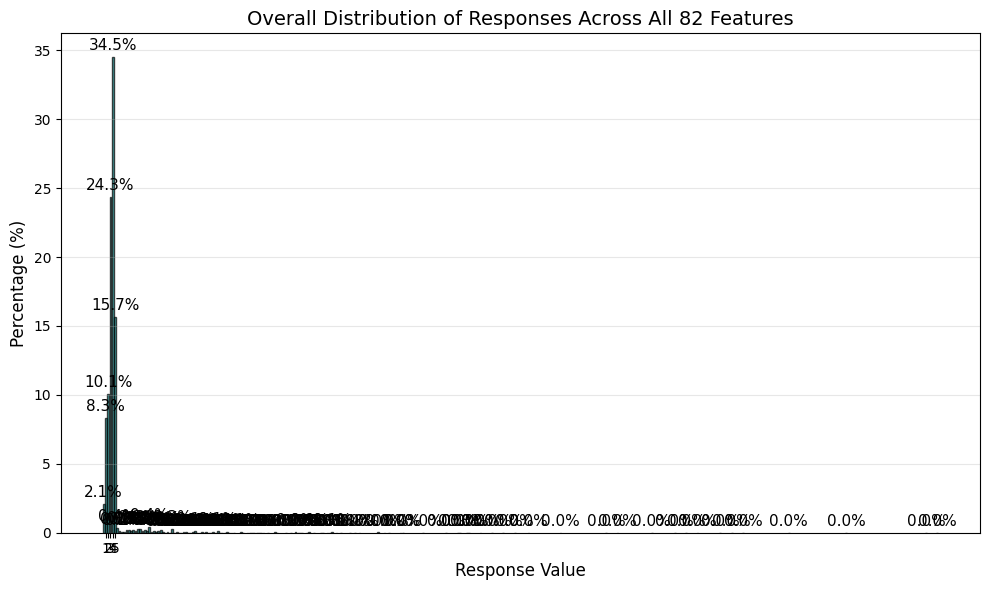


=== Response Tendency Analysis ===

Features with strong negative skew (tendency toward higher values):
Q12          -1.534358
Q7.2         -1.142886
Q3           -1.114928
Q2.Cluster   -1.114781
Q1.21        -1.054138
Q1.29        -0.888692
Q1.1         -0.885781
Q1.19        -0.885638
Q1.24        -0.840188
Q7.3         -0.818875
dtype: float64

Features with strong positive skew (tendency toward lower values):
Q7.1     0.592301
Q17      0.700140
Q5       0.798642
Q16      0.869893
Q14      1.240418
Q13      1.256943
Q4       1.479761
Q10      2.739638
Q2       3.509042
Q6      10.297348
dtype: float64


In [45]:
# Response distribution patterns
print("=== Overall Response Pattern Analysis ===\n")

# Calculate percentage of each response value across all features
all_responses = data[feature_cols].values.flatten()
response_dist = pd.Series(all_responses).value_counts(normalize=True).sort_index() * 100

print("Overall distribution of responses across all 82 features:")
for value, pct in response_dist.items():
    print(f"  Response {int(value)}: {pct:.2f}%")

# Visualize overall response distribution
plt.figure(figsize=(10, 6))
plt.bar(response_dist.index, response_dist.values, edgecolor='black', alpha=0.7, color='teal')
plt.xlabel('Response Value', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Overall Distribution of Responses Across All 82 Features', fontsize=14)
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for i, (val, pct) in enumerate(zip(response_dist.index, response_dist.values)):
    plt.text(val, pct + 0.5, f'{pct:.1f}%', ha='center', fontsize=11)

plt.tight_layout()
plt.show()

# Response tendency analysis
print("\n=== Response Tendency Analysis ===")
skewness = data[feature_cols].skew().sort_values()
print(f"\nFeatures with strong negative skew (tendency toward higher values):")
print(skewness.head(10))
print(f"\nFeatures with strong positive skew (tendency toward lower values):")
print(skewness.tail(10))

=== Distribution Patterns Across All Features ===

Features with lowest average scores (most negative/disagree):
Q17           0.334874
Q18           0.498400
Q2.Cluster    0.743335
Q2            0.901173
Q11           1.448987
Q13           2.081052
Q7.1          2.232847
Q14           2.267330
Q8            2.310700
Q15           2.544614
dtype: float64

Features with highest average scores (most positive/agree):
Q1.29     4.030217
Q1.24     4.108781
Q1.18     4.121934
Q3        4.151795
Q1.19     4.200142
Q1.21     4.249556
Q12      13.423036
Q6       22.830786
Q16      24.767153
Q10      46.253822
dtype: float64


Features with highest variance (most diverse opinions):
Q10     1945.528724
Q16      412.798892
Q6       113.959977
Q12       21.583424
Q4         5.311297
Q14        3.656105
Q13        3.209644
Q5         2.385957
Q9.1       1.550530
Q9.4       1.368922
dtype: float64

Features with lowest variance (most consensus):
Q1.21         0.528738
Q1.19         0.524296
Q16.22  

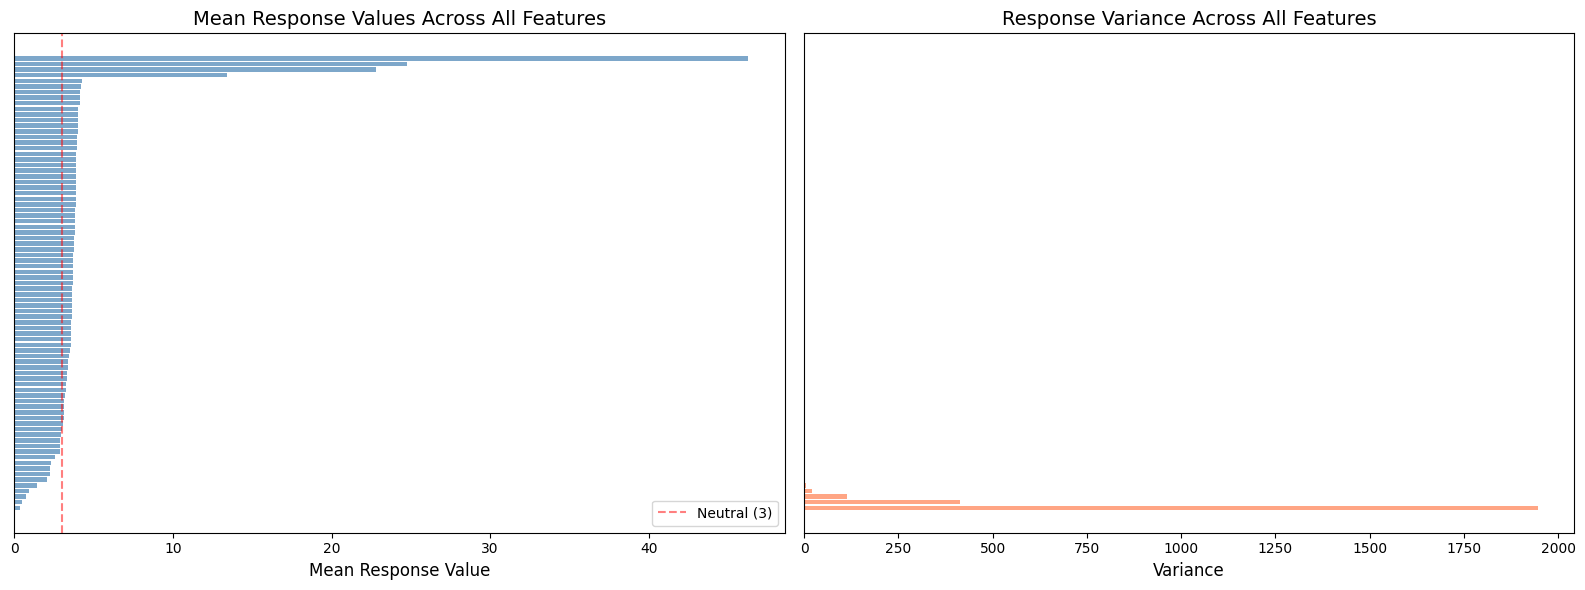

In [46]:
# Distribution summary - Overall patterns
print("=== Distribution Patterns Across All Features ===\n")

# Calculate average response for each feature
avg_responses = data[feature_cols].mean().sort_values()
print("Features with lowest average scores (most negative/disagree):")
print(avg_responses.head(10))
print("\nFeatures with highest average scores (most positive/agree):")
print(avg_responses.tail(10))

# Calculate variance/spread for each feature
variance = data[feature_cols].var().sort_values(ascending=False)
print("\n\nFeatures with highest variance (most diverse opinions):")
print(variance.head(10))
print("\nFeatures with lowest variance (most consensus):")
print(variance.tail(10))

# Visualize mean and variance together
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Mean values
axes[0].barh(range(len(avg_responses)), avg_responses.values, color='steelblue', alpha=0.7)
axes[0].set_yticks([])
axes[0].set_xlabel('Mean Response Value', fontsize=12)
axes[0].set_title('Mean Response Values Across All Features', fontsize=14)
axes[0].axvline(x=3, color='red', linestyle='--', alpha=0.5, label='Neutral (3)')
axes[0].legend()

# Variance values
axes[1].barh(range(len(variance)), variance.values, color='coral', alpha=0.7)
axes[1].set_yticks([])
axes[1].set_xlabel('Variance', fontsize=12)
axes[1].set_title('Response Variance Across All Features', fontsize=14)

plt.tight_layout()
plt.show()

In [80]:
train,test=train_test_split(data,test_size=0.2,random_state=42)

# LCA Clustering for segmentation

For Latent Class Analysis (LCA), the rule is:

Choose the number of classes that MINIMIZES BIC
(BIC is the primary criterion for LCA)

In [81]:
# LCA for segmentation
# Function to fit LCA model with multiple random starts
from stepmix.stepmix import StepMix
def fit_lca(n_components, n_init=5, max_iter=1000):
    model = StepMix(n_components=n_components, measurement="categorical", 
                    n_init=n_init, max_iter=max_iter, verbose=0)
    model.fit(train.drop(columns=['RESPID']))
    return model

# Fit models for different numbers of classes
max_classes = 6  # Adjust based on your needs
models = [fit_lca(k) for k in range(2, max_classes + 1)]

c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 5/5 [02:09<00:00, 25.98s/it, max_LL=-2.28e+5, max_avg_LL=-101]
c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 5/5 [05:38<00:00, 67.68s/it, max_LL=-2.24e+5, max_avg_LL=-99.5]
c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 5/5 [12:08<00:00, 145.79s/it, max_LL=-2.22e+5, max_avg_LL=-98.4]
c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 5/5 [25:41<00:00, 308.24s/it, max_LL=-2.19e+5, max_avg_LL=-97.5]
c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 5/5 [23:35<00:00, 283.03s/it, max_LL=-2.18e+5, max_avg_LL=-96.8]


In [72]:
# Find the appropriate number of classes based on BIC and AIC
bics = [model.bic(train.drop(columns=['RESPID'])) for model in models]
aics = [model.aic(train.drop(columns=['RESPID'])) for model in models]
best_k_bic = np.argmin(bics) + 2  # +2 because range starts at 2
best_k_aic = np.argmin(aics) + 2
best_lca_model_bic = models[best_k_bic - 2]
best_lca_model_aic = models[best_k_aic - 2]
print(f"Best number of classes according to BIC: {best_k_bic}")
print(f"Best number of classes according to AIC: {best_k_aic}")

c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-pack

Best number of classes according to BIC: 3
Best number of classes according to AIC: 6


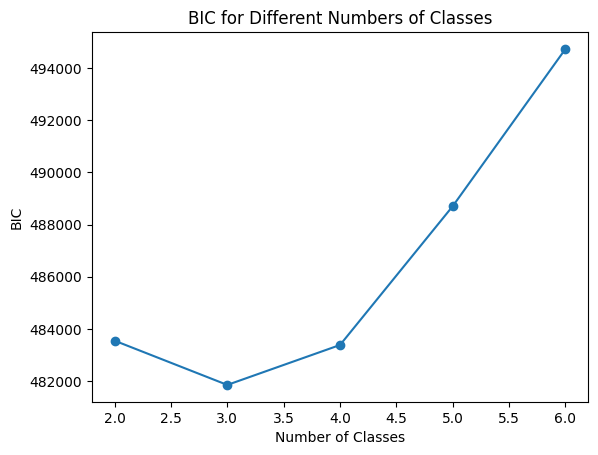

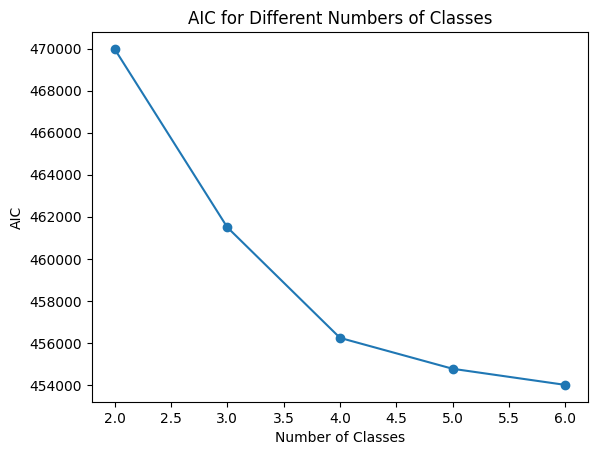

In [56]:
# Plot the screen plot of BIC values
import matplotlib.pyplot as plt
plt.plot(range(2, max_classes + 1), bics, marker='o')
plt.xlabel('Number of Classes')
plt.ylabel('BIC')
plt.title('BIC for Different Numbers of Classes')
plt.show()

# plot the screen plot of AIC values
plt.plot(range(2, max_classes + 1), aics, marker='o')
plt.xlabel('Number of Classes')
plt.ylabel('AIC')
plt.title('AIC for Different Numbers of Classes')
plt.show()

In [85]:
train.head()

,RESPID,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,...,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27,Q17,Q18,LCA_3_Classes,LCA_4_Classes
1742,229818,4,3,2,3,3,4,3,4,2,...,4,4,2,4,4,4,0,1,2,2
2184,228583,2,3,3,5,4,2,2,4,2,...,4,5,4,4,4,3,1,1,1,2
1566,422743,4,2,4,4,4,5,5,5,4,...,4,5,4,5,5,5,1,1,0,0
2512,603,4,5,1,1,1,2,4,5,1,...,4,4,4,3,3,3,0,0,2,3
1025,231710,5,2,5,5,4,5,5,5,5,...,4,4,3,4,4,4,0,1,1,1


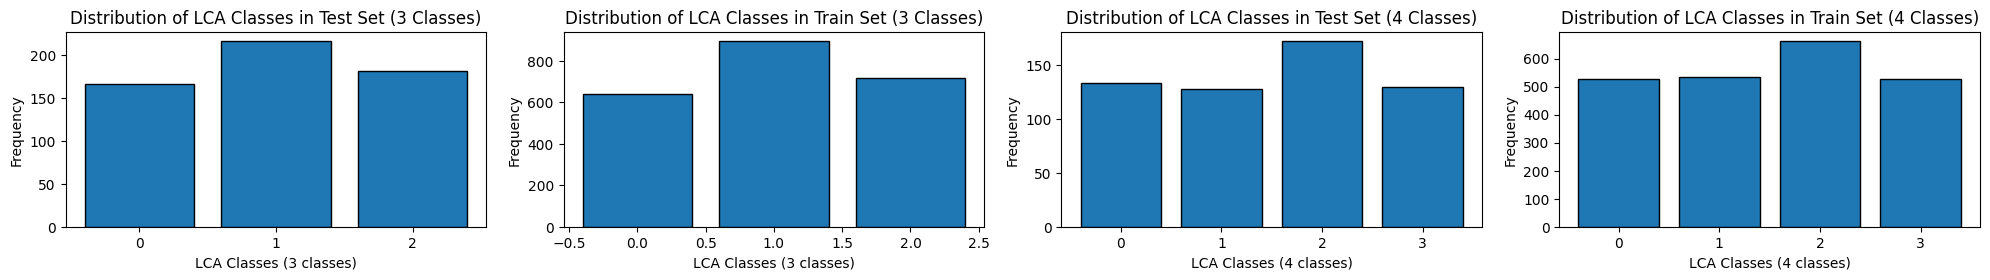

3 Classes Distribution:
(array([0, 1, 2], dtype=int64), array([166, 216, 181], dtype=int64))

4 Classes Distribution:
(array([0, 1, 2, 3], dtype=int64), array([133, 128, 172, 130], dtype=int64))


In [88]:
# Predict class labels for test set with 3 and 4 classes
# # Get models for 3 and 4 classes (index 1 and 2 since models list starts at 2 classes)
# model_3_classes = models[1]  # 3 classes (index 1 = 3-2)
# model_4_classes = models[2]  # 4 classes (index 2 = 4-2)

# # Get the exact same features that were used during training (all except RESPID)
# # Drop ALL class-related columns that may have been added after training
# train_features_lca = train.drop(columns=[col for col in train.columns 
# 										  if col == 'RESPID'], errors='ignore')
# test_features_lca = test.drop(columns=[col for col in test.columns 
# 										if col == 'RESPID'], errors='ignore')

# # Predict for 3 classes
# train['LCA_3_Classes'] = model_3_classes.predict(train_features_lca)
# test['LCA_3_Classes'] = model_3_classes.predict(test_features_lca)

# # Predict for 4 classes

# train_class_cols = [col for col in train.columns if col in ['RESPID', 'LCA_3_Classes', 'KMode_Classes']]
# # Predict for 4 classes (using the same base features)
# test['LCA_4_Classes'] = model_4_classes.predict(test_features_lca)
# train['LCA_4_Classes'] = model_4_classes.predict(train_features_lca)
plt.figure(figsize=(20, 5))

plt.subplot(2, 4, 1)
plt.hist(test['LCA_3_Classes'], bins=np.arange(3 + 1) - 0.5, rwidth=0.8, edgecolor='black')
plt.xlabel('LCA Classes (3 classes)')
plt.ylabel('Frequency')
plt.title('Distribution of LCA Classes in Test Set (3 Classes)')
plt.xticks(range(3))

plt.subplot(2, 4, 2)
plt.hist(train['LCA_3_Classes'], bins=np.arange(3 + 1) - 0.5, rwidth=0.8, edgecolor='black')
plt.xlabel('LCA Classes (3 classes)')
plt.ylabel('Frequency')
plt.title('Distribution of LCA Classes in Train Set (3 Classes)')

# Plot distribution for 4 classes in train and test set
plt.subplot(2, 4, 3)
plt.hist(test['LCA_4_Classes'], bins=np.arange(4 + 1) - 0.5, rwidth=0.8, edgecolor='black')
plt.xlabel('LCA Classes (4 classes)')
plt.ylabel('Frequency')
plt.title('Distribution of LCA Classes in Test Set (4 Classes)')
plt.xticks(range(4))

plt.subplot(2, 4, 4)
plt.hist(train['LCA_4_Classes'], bins=np.arange(4 + 1) - 0.5, rwidth=0.8, edgecolor='black')
plt.xlabel('LCA Classes (4 classes)')
plt.ylabel('Frequency')
plt.title('Distribution of LCA Classes in Train Set (4 Classes)')
plt.xticks(range(4))

plt.tight_layout()
plt.show()

# Print class counts
print("3 Classes Distribution:")
print(np.unique(test['LCA_3_Classes'], return_counts=True))
print("\n4 Classes Distribution:")
print(np.unique(test['LCA_4_Classes'], return_counts=True))

## Validate the best model by comparing the cluster membership between train and test data

# K-Mode clusting for segmentation
We will use K-Mode clustering as it is better for this data set which is all categorical variables.

Algorithm :      Cost meaning

K-Means    :     Sum of squared Euclidean distances

K-Medians   :    Sum of Manhattan distances

K-Modes      :   Total categorical mismatches

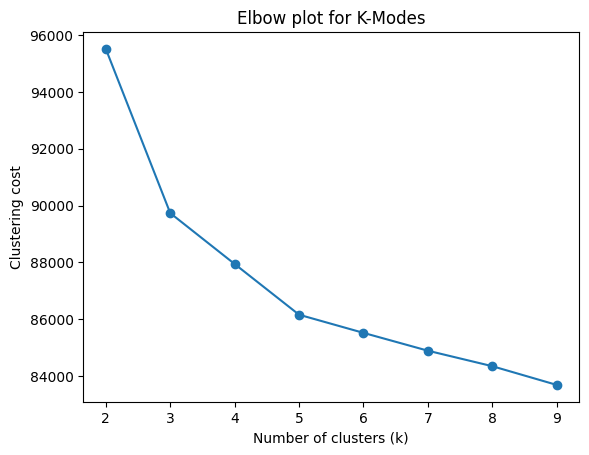

In [ ]:
from kmodes.kmodes import KModes
cost = []
K = range(2, 10)

for k in K:
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    km.fit(train.drop(columns=['RESPID']))
    cost.append(km.cost_)

plt.plot(K, cost, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Clustering cost")
plt.title("Elbow plot for K-Modes")
plt.show()


Text(0.5, 1.0, 'Distribution of K-Mode Classes in Test Set')

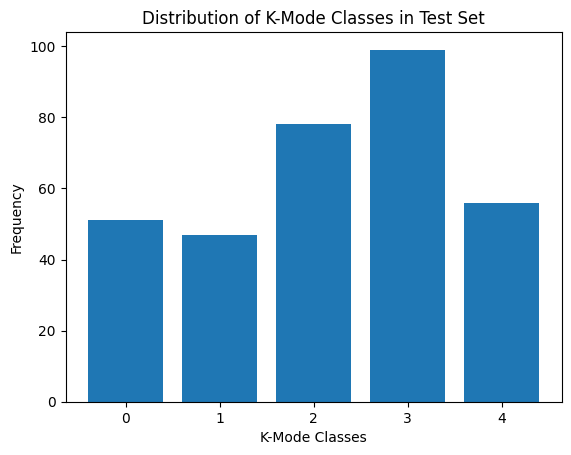

In [30]:
# use the best run to predict test set clusters
# Drop columns that are not features (RESPID and any previously added class columns)
km_features = test.drop(columns=[col for col in test.columns if col == 'RESPID' or 'Classes' in col])
test['KMode_Classes'] = km.predict(km_features)
plt.hist(test['KMode_Classes'], bins=np.arange(5 + 1) - 0.5, rwidth=0.8)
plt.xlabel('K-Mode Classes')
plt.ylabel('Frequency')
plt.title('Distribution of K-Mode Classes in Test Set')

# GMM clustering for segmentation
Soft Assignment (Probabilistic Membership): Survey respondents often don't fit perfectly into a single category (e.g., a customer might be 60% "Price Sensitive" and 40% "Brand Loyal"). GMM assigns a probability for each cluster, allowing for a better understanding of "bridge" segments or customers with mixed preferences.

In [36]:
# GMM clustering for segmentation
from sklearn.mixture import GaussianMixture
G = range(2, 6)

# Store all GMM models
gmm_models = []
for k in G:
    gmm = GaussianMixture(n_components=k, n_init=50, random_state=42)
    gmm.fit(train.drop(columns=['RESPID']))
    gmm_models.append(gmm)
    gmm_bics = [model.bic(train.drop(columns=['RESPID'])) for model in gmm_models]

# Based on AIC and BIC, choose the no: of clusters from screen plot

[481957.87997476524, 493128.6881980744, 507609.610074873, 528138.7636095474]


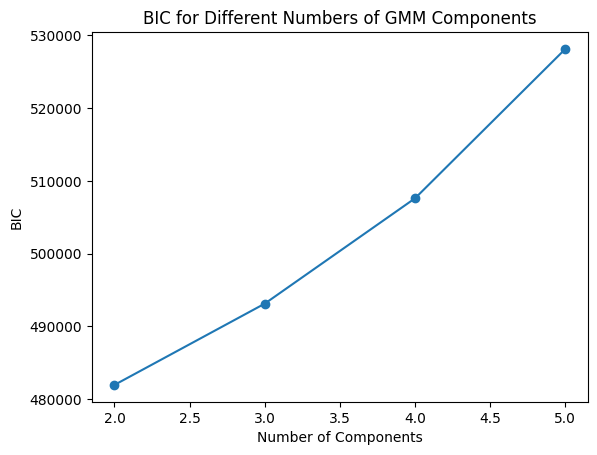

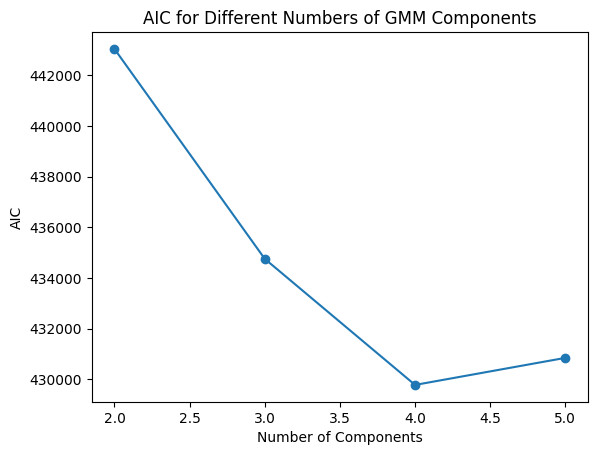

Best number of components according to BIC: 2


In [37]:
# plot the screen plot of BIC values

plt.plot(G, gmm_bics, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.title('BIC for Different Numbers of GMM Components')
plt.show()

# Plot AIC values as well
gmm_aics = [model.aic(train.drop(columns=['RESPID'])) for model in gmm_models]
plt.plot(G, gmm_aics, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('AIC')
plt.title('AIC for Different Numbers of GMM Components')
plt.show()

# Find best model based on BIC (lower is better)
best_gmm_idx = np.argmin(gmm_bics)
best_gmm = gmm_models[best_gmm_idx]
print(f"Best number of components according to BIC: {list(G)[best_gmm_idx]}")

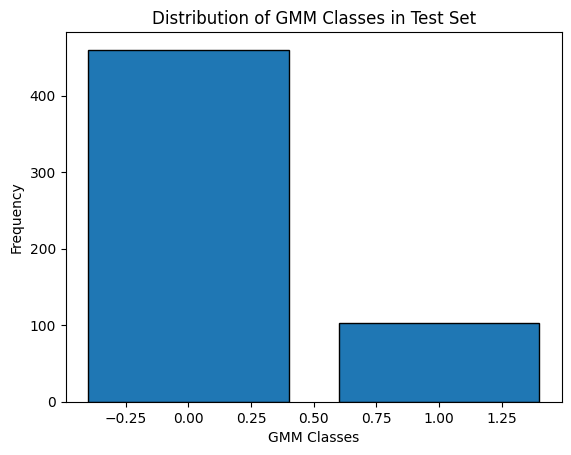

GMM Classes Distribution:
(array([0, 1], dtype=int64), array([460, 103], dtype=int64))


In [ ]:
# Predict the class labels for the test set using the best GMM model

#Considering 3 clusters for GMM based on BIC plot
gm_pred = test.drop(columns=[col for col in test.columns if col == 'RESPID' or 'Classes' in col])
test['GM_Classes'] = best_gmm.predict(gm_pred)

# Plot distribution
plt.hist(test['GM_Classes'], bins=np.arange(list(G)[best_gmm_idx] + 1) - 0.5, rwidth=0.8, edgecolor='black')
plt.xlabel('GMM Classes')
plt.ylabel('Frequency')
plt.title('Distribution of GMM Classes in Test Set')
plt.show()

print("GMM Classes Distribution:")
print(np.unique(test['GM_Classes'], return_counts=True))

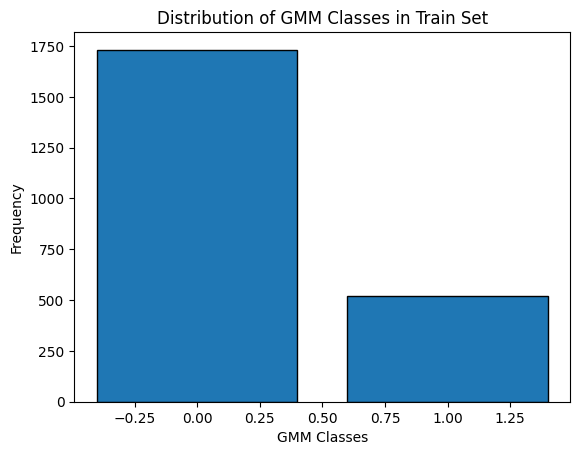

In [90]:
#GMM class distribution for train 
gm_pred_train = train.drop(columns=[col for col in train.columns if col == 'RESPID' or 'Classes' in col])
train['GM_Classes'] = best_gmm.predict(gm_pred_train)
plt.hist(train['GM_Classes'], bins=np.arange(list(G)[best_gmm_idx] + 1) - 0.5, rwidth=0.8, edgecolor='black')
plt.xlabel('GMM Classes')
plt.ylabel('Frequency')
plt.title('Distribution of GMM Classes in Train Set')
plt.show()

### Validation Summary

A good clustering model should have similar class distributions between train and test sets. This indicates:
- **Stability**: The segments are consistent across different data samples
- **Generalizability**: The model captures true underlying patterns, not just noise in the training data
- **Reliability**: The segments can be trusted for business decisions

Look for:
1. Similar proportions in each cluster between train and test
2. All clusters appearing in both datasets (no empty clusters in test)
3. Differences of less than 5-10% in cluster proportions indicate good validation

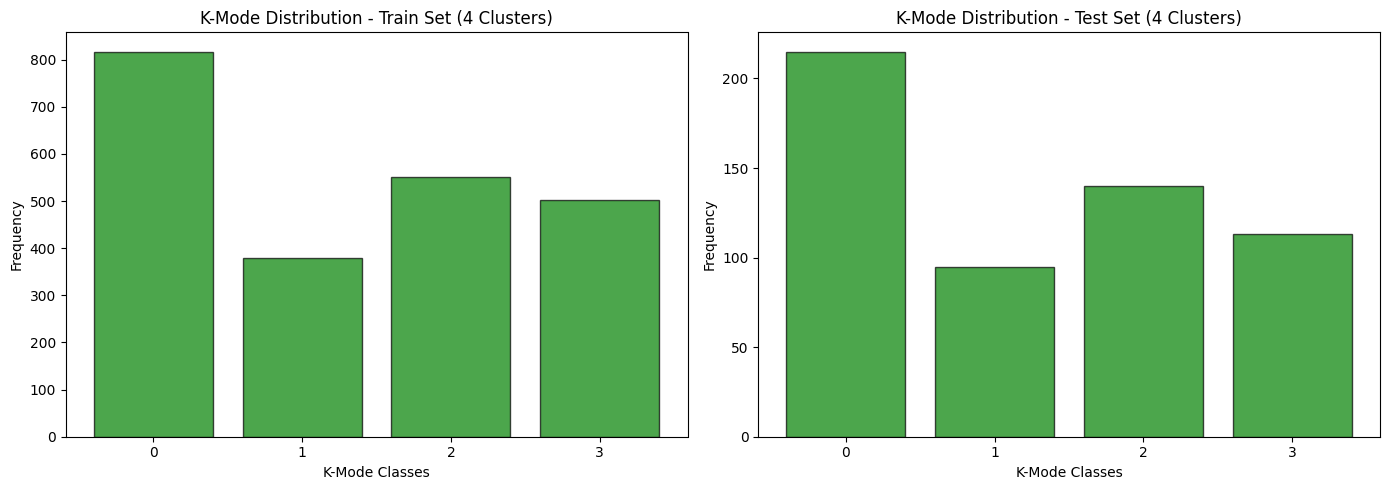

K-Mode - Train Set Class Distribution:
Classes: [0 1 2 3]
Counts: [817 379 551 503]
Proportions: [0.36311111 0.16844444 0.24488889 0.22355556]

K-Mode - Test Set Class Distribution:
Classes: [0 1 2 3]
Counts: [215  95 140 113]
Proportions: [0.38188277 0.1687389  0.24866785 0.20071048]


In [53]:
# First, fit the best K-Mode model (from elbow plot, looks like k=4 or k=5)
# Drop all columns except features for training
train_km_features = train.drop(columns=[col for col in train.columns if col == 'RESPID' or 'Classes' in col])
best_k_mode = KModes(n_clusters=4, init='Huang', n_init=5, verbose=0)
best_k_mode.fit(train_km_features)

# Predict on train and test
train['KMode_Classes'] = best_k_mode.predict(train_km_features)
km_features = test.drop(columns=[col for col in test.columns if col == 'RESPID' or 'Classes' in col])
test['KMode_Classes'] = best_k_mode.predict(km_features)

# Compare distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Train distribution
axes[0].hist(train['KMode_Classes'], bins=np.arange(4 + 1) - 0.5, rwidth=0.8, edgecolor='black', alpha=0.7, color='green')
axes[0].set_xlabel('K-Mode Classes')
axes[0].set_ylabel('Frequency')
axes[0].set_title('K-Mode Distribution - Train Set (4 Clusters)')
axes[0].set_xticks(range(4))

# Test distribution
axes[1].hist(test['KMode_Classes'], bins=np.arange(4 + 1) - 0.5, rwidth=0.8, edgecolor='black', alpha=0.7, color='green')
axes[1].set_xlabel('K-Mode Classes')
axes[1].set_ylabel('Frequency')
axes[1].set_title('K-Mode Distribution - Test Set (4 Clusters)')
axes[1].set_xticks(range(4))

plt.tight_layout()
plt.show()

# Print proportions for comparison
print("K-Mode - Train Set Class Distribution:")
train_counts = np.unique(train['KMode_Classes'], return_counts=True)
print(f"Classes: {train_counts[0]}")
print(f"Counts: {train_counts[1]}")
print(f"Proportions: {train_counts[1] / len(train)}")

print("\nK-Mode - Test Set Class Distribution:")
test_counts = np.unique(test['KMode_Classes'], return_counts=True)
print(f"Classes: {test_counts[0]}")
print(f"Counts: {test_counts[1]}")
print(f"Proportions: {test_counts[1] / len(test)}")


# HDBSCAN clustering for segmentation

What HDBSCAN is good at when you don’t know the segments yet.

Strengths: Automatically determines number of clusters, Finds uneven density clusters

Typical use cases

Market segmentation discovery

Customer behavior clustering

Anomaly detection

Exploratory analysis

In [94]:
#Perform HDBScan by feature selection (skip Q1.3 to Q1.8, Q6 may be correlated with 5, Q13,Q16.1 to Q16.20, Q17, Q18 )

unselected_features=["RESPID", "Q1.3", "Q1.4", "Q1.5", "Q1.6", "Q1.7", "Q1.8",
    "Q6",
    "Q13",
    "Q16.1", "Q16.2", "Q16.3", "Q16.4", "Q16.5",
    "Q16.6", "Q16.7", "Q16.8", "Q16.9", "Q16.10",
    "Q16.11", "Q16.12", "Q16.13", "Q16.14", "Q16.15",
    "Q16.16", "Q16.17", "Q16.18", "Q16.19", "Q16.20",
    "Q17",
    "Q18"
]

train1,test1=train_test_split(data,test_size=0.2,random_state=42)

train_hdb = train1.drop(columns=unselected_features)
test_hdb = test1.drop(columns=unselected_features)

In [95]:
# HDBSCAN with different min_cluster_size to control number of clusters
import hdbscan
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Test different min_cluster_size values to get clusters from 2 to 6
results = []
min_cluster_sizes = [5, 10, 15, 20, 25, 30, 40, 50, 60, 80, 100]

print("Testing different min_cluster_size parameters for HDBSCAN:")
print("=" * 80)

for min_size in min_cluster_sizes:
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_size, min_samples=5)
    labels = clusterer.fit_predict(train_hdb)
    
    # Count number of clusters (excluding noise -1)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    # Calculate metrics only if we have valid clusters
    if n_clusters >= 2:
        # Only calculate metrics on non-noise points
        non_noise_mask = labels != -1
        if non_noise_mask.sum() > 0:
            silhouette = silhouette_score(train_hdb[non_noise_mask], labels[non_noise_mask])
            calinski = calinski_harabasz_score(train_hdb[non_noise_mask], labels[non_noise_mask])
        else:
            silhouette = -1
            calinski = 0
    else:
        silhouette = -1
        calinski = 0
    
    results.append({
        'min_cluster_size': min_size,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'noise_pct': (n_noise / len(labels)) * 100,
        'silhouette': silhouette,
        'calinski': calinski,
        'clusterer': clusterer
    })
    
    print(f"min_cluster_size={min_size:3d}: {n_clusters} clusters, "
          f"{n_noise:4d} noise points ({n_noise/len(labels)*100:5.1f}%), "
          f"Silhouette={silhouette:6.3f}, Calinski={calinski:8.1f}")

print("=" * 80)

# Filter results for clusters between 2 and 6
valid_results = [r for r in results if 2 <= r['n_clusters'] <= 6]

if valid_results:
    # Select best based on silhouette score
    best_result = max(valid_results, key=lambda x: x['silhouette'])
    print(f"\n✓ Best configuration: min_cluster_size={best_result['min_cluster_size']}")
    print(f"  Number of clusters: {best_result['n_clusters']}")
    print(f"  Silhouette score: {best_result['silhouette']:.3f}")
    print(f"  Calinski-Harabasz score: {best_result['calinski']:.1f}")
    print(f"  Noise points: {best_result['n_noise']} ({best_result['noise_pct']:.1f}%)")
else:
    print("\nNo configuration found with 2-6 clusters. Using best available configuration.")
    best_result = max(results, key=lambda x: x['silhouette'] if x['n_clusters'] >= 2 else -1)
    print(f"  min_cluster_size={best_result['min_cluster_size']}, clusters={best_result['n_clusters']}")

Testing different min_cluster_size parameters for HDBSCAN:


c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


min_cluster_size=  5: 4 clusters,   23 noise points (  1.0%), Silhouette= 0.363, Calinski=   357.8


c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


min_cluster_size= 10: 4 clusters,   23 noise points (  1.0%), Silhouette= 0.363, Calinski=   357.8


c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


min_cluster_size= 15: 4 clusters,   59 noise points (  2.6%), Silhouette= 0.373, Calinski=   422.3


c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


min_cluster_size= 20: 4 clusters,   59 noise points (  2.6%), Silhouette= 0.373, Calinski=   422.3


c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


min_cluster_size= 25: 4 clusters,   59 noise points (  2.6%), Silhouette= 0.373, Calinski=   422.3


c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


min_cluster_size= 30: 2 clusters,   11 noise points (  0.5%), Silhouette= 0.326, Calinski=   138.4


c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


min_cluster_size= 40: 2 clusters,   11 noise points (  0.5%), Silhouette= 0.326, Calinski=   138.4


c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


min_cluster_size= 50: 2 clusters,   11 noise points (  0.5%), Silhouette= 0.326, Calinski=   138.4


c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


min_cluster_size= 60: 2 clusters,   11 noise points (  0.5%), Silhouette= 0.326, Calinski=   138.4


c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


min_cluster_size= 80: 2 clusters,  456 noise points ( 20.3%), Silhouette= 0.505, Calinski=   906.2


c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


min_cluster_size=100: 2 clusters,  456 noise points ( 20.3%), Silhouette= 0.505, Calinski=   906.2

✓ Best configuration: min_cluster_size=80
  Number of clusters: 2
  Silhouette score: 0.505
  Calinski-Harabasz score: 906.2
  Noise points: 456 (20.3%)


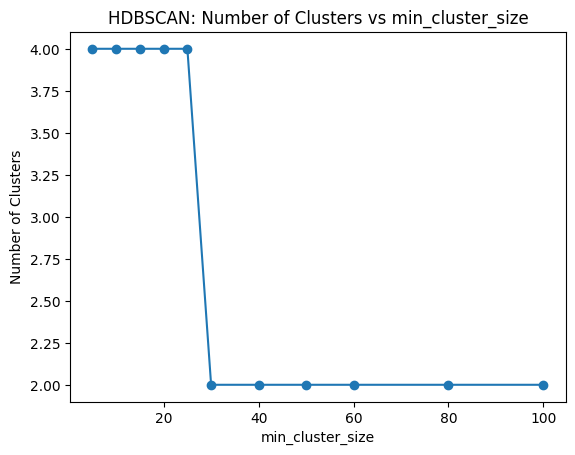

In [97]:
#Plot results of all clusters results to pick the best one
cluster_counts = [r['n_clusters'] for r in results]
plt.plot(min_cluster_sizes, cluster_counts, marker='o')
plt.xlabel('min_cluster_size')
plt.ylabel('Number of Clusters')
plt.title('HDBSCAN: Number of Clusters vs min_cluster_size')
plt.show()


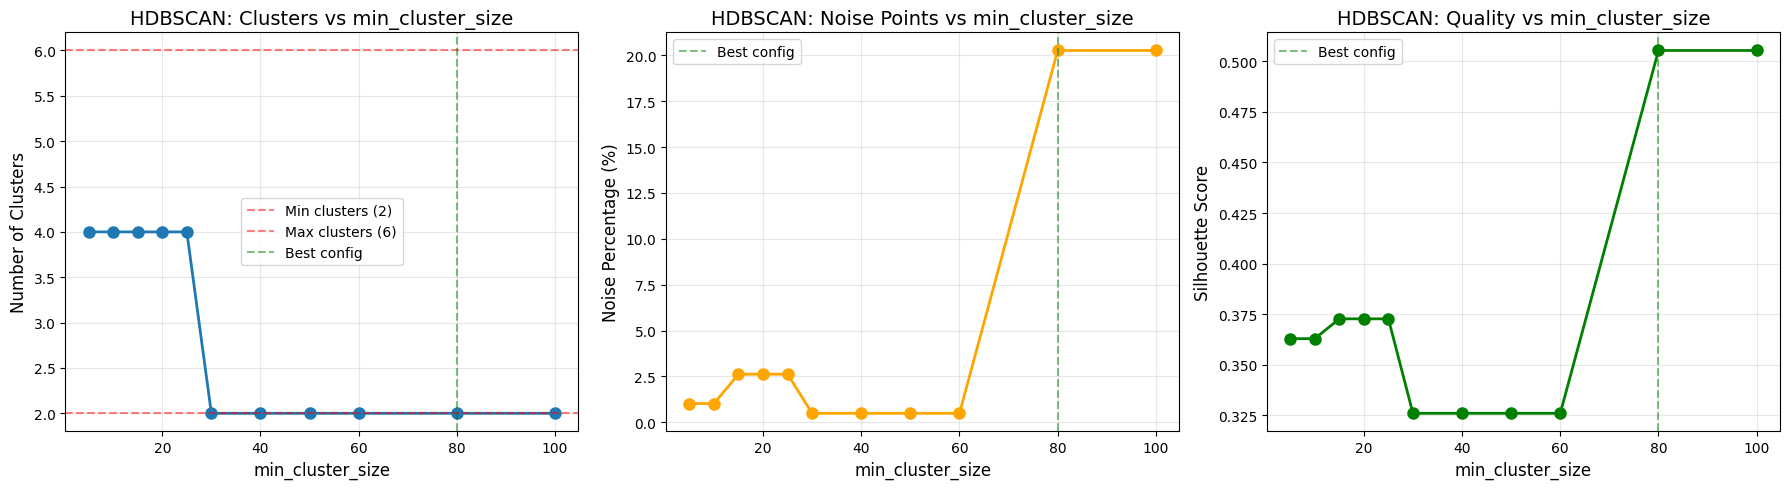

In [99]:
# Visualize cluster count vs min_cluster_size
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Number of clusters
axes[0].plot([r['min_cluster_size'] for r in results], 
             [r['n_clusters'] for r in results], 
             marker='o', linewidth=2, markersize=8)
axes[0].axhline(y=2, color='red', linestyle='--', alpha=0.5, label='Min clusters (2)')
axes[0].axhline(y=6, color='red', linestyle='--', alpha=0.5, label='Max clusters (6)')
axes[0].axvline(x=best_result['min_cluster_size'], color='green', linestyle='--', alpha=0.5, label='Best config')
axes[0].set_xlabel('min_cluster_size', fontsize=12)
axes[0].set_ylabel('Number of Clusters', fontsize=12)
axes[0].set_title('HDBSCAN: Clusters vs min_cluster_size', fontsize=14)
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Plot 2: Noise percentage
axes[1].plot([r['min_cluster_size'] for r in results], 
             [r['noise_pct'] for r in results], 
             marker='o', linewidth=2, markersize=8, color='orange')
axes[1].axvline(x=best_result['min_cluster_size'], color='green', linestyle='--', alpha=0.5, label='Best config')
axes[1].set_xlabel('min_cluster_size', fontsize=12)
axes[1].set_ylabel('Noise Percentage (%)', fontsize=12)
axes[1].set_title('HDBSCAN: Noise Points vs min_cluster_size', fontsize=14)
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Plot 3: Silhouette score
valid_silhouettes = [(r['min_cluster_size'], r['silhouette']) for r in results if r['silhouette'] > -1]
if valid_silhouettes:
    axes[2].plot([x[0] for x in valid_silhouettes], 
                 [x[1] for x in valid_silhouettes], 
                 marker='o', linewidth=2, markersize=8, color='green')
    axes[2].axvline(x=best_result['min_cluster_size'], color='green', linestyle='--', alpha=0.5, label='Best config')
    axes[2].set_xlabel('min_cluster_size', fontsize=12)
    axes[2].set_ylabel('Silhouette Score', fontsize=12)
    axes[2].set_title('HDBSCAN: Quality vs min_cluster_size', fontsize=14)
    axes[2].grid(True, alpha=0.3)
    axes[2].legend()

plt.tight_layout()
plt.show()

min_cluster_size = 80 is a quality-first choice:

✔ Highest silhouette score

✔ Very clean, well-separated clusters

❌ High noise (≈20%)

min_cluster_size = 20–25 is a coverage-first choice:

✔ More data retained

✔ 4 clusters instead of 2

❌ Lower cluster separation

We can look at 4 clusters

## 2 Analyze the segments created in different clustering Methods
Build profile of segments. What can you do with these
segments? Build comprehensive Marketing Plans for
each of the segments . (25

In [103]:
import hdbscan
x=data.drop(columns=unselected_features)
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=20,
    min_samples=10,          # optional: increases robustness
    cluster_selection_method="eom",
    prediction_data=True
)

labels = clusterer.fit_predict(x)


c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


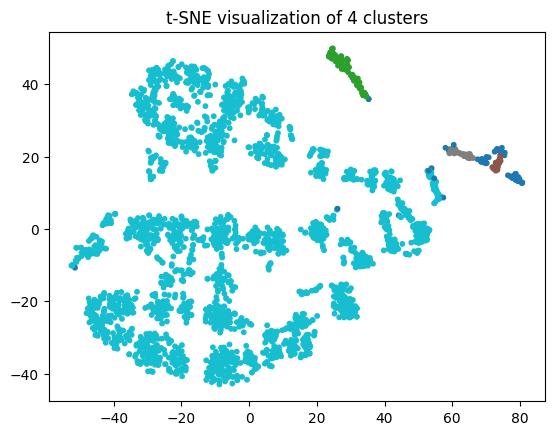

In [110]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

embedding = TSNE(
    n_components=2,
    perplexity=30,
    random_state=42
).fit_transform(x)

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=labels,
    cmap="tab10",
    s=10
)
plt.title("t-SNE visualization of 4 clusters")
plt.show()


In [112]:
import numpy as np

big = x[labels == 0]
small = x[labels == 1]

np.mean(np.linalg.norm(big - big.mean(axis=0), axis=1)),
np.mean(np.linalg.norm(small - small.mean(axis=0), axis=1))


15.889340525438842

In [113]:
# recluster large cluster
mask = labels == 0   # adjust if a different label is the big one
X_big = x[mask]

clusterer_big = hdbscan.HDBSCAN(
    min_cluster_size=20,
    min_samples=10
)

labels_big = clusterer_big.fit_predict(X_big)


c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\cicily.mathew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# tsne plot for big cluster
embedding_big = TSNE(
    n_components=2,
    perplexity=30,
    random_state=42
).fit_transform(X_big)


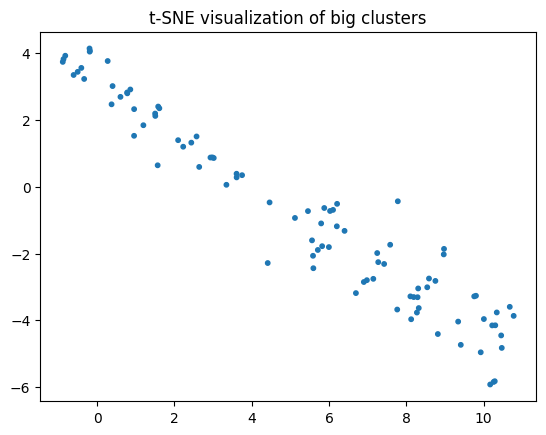

In [117]:
plt.scatter(
    embedding_big[:, 0],
    embedding_big[:, 1],
    c=labels_big    ,
    cmap="tab10",
    s=10
)
plt.title("t-SNE visualization of big clusters")
plt.show()


Cluster created with HDBScan indicates high variance around 15 for 1 big cluster and 3 small tight clusters.